# <p style="font-family: Arial; font-size:1em;color:#db2345;"> Titanic exploration </p>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv("/Users/lolitiy/Downloads/titanic.csv", sep ='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [39]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [33]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,125,80.1
Age,30,19.2
Embarked,1,0.6
Fare,0,0.0
Ticket,0,0.0


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27fd16d0>,
      dtype=object)

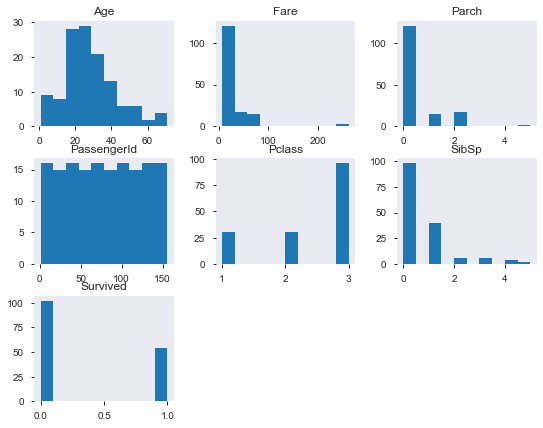

In [67]:
df.hist(bins=10,figsize=(9,7),grid=False)

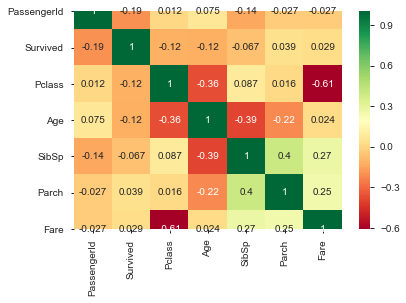

In [64]:
correlation = df.corr()
ax =sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

### <p style="font-family: Arial; font-size:1em;color:#A325FA];">  Relationship between age and survival rate
</p>

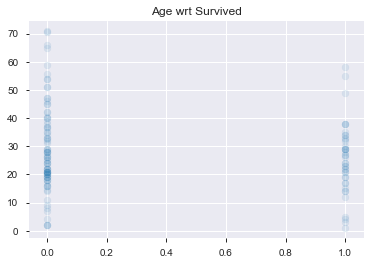

In [63]:
plt.scatter(df.Survived, df.Age, alpha=0.1)   ## here the plot has to be transparent so we need to pic low alpha value
plt.title("Age wrt Survived")
plt.show()

### <p style="font-family: Arial; font-size:1em;color:#A325FA];">  passenger class vs passengers age
</p>

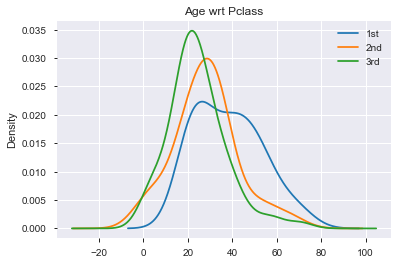

In [66]:
for x in [1,2,3]:    ## for 3 classes
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

Text(0.5, 0.98, 'Survival by Gender , Age and Fare')

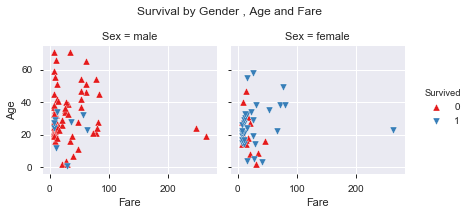

In [68]:
g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

# <p style="font-family: Arial; font-size:1em;color:#A325FA];"> Or use pandas profiling </p>

In [30]:
import pandas as pd
import pandas_profiling as prof

In [26]:
profile = prof.ProfileReport(df)

/Users/lolitiy/opt/miniconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [29]:
profile

Number of variables,12
Number of observations,156
Total Missing (%),8.3%
Total size in memory,14.8 KiB
Average record size in memory,96.8 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0
